# Remove Outlier from Raw Data
1. [Import Library](#1.-Import-Library)
2. [Remove Outlier from Accelerometer Data](#2.-Remove-Outlier-from-Accelerometer-Data)
3. [Remove Outlier from Gyroscope Data](#3.-Remove-Outlier-from-Gyroscope-Data)

### 1. Import Library

In [12]:
from glob import glob
import os

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Remove Outlier from Accelerometer Data
#### 2.1. Get Filepaths with `glob`

In [13]:
glob('data/accelerometer/raw/*')

['data/accelerometer/raw/right_hand2.csv',
 'data/accelerometer/raw/right_hand1.csv',
 'data/accelerometer/raw/left_hand2.csv',
 'data/accelerometer/raw/left_hand1.csv']

In [14]:
sensor = 'accelerometer'
filepaths = sorted(glob(f'data/{sensor}/raw/*.csv'))
filepaths

['data/accelerometer/raw/left_hand1.csv',
 'data/accelerometer/raw/left_hand2.csv',
 'data/accelerometer/raw/right_hand1.csv',
 'data/accelerometer/raw/right_hand2.csv']

#### 2.2. Read Data with `pd.read_csv`
`df.head()` will return top 5 rows.

In [15]:
df = pd.read_csv(filepaths[0])
df.head()

time     gFx     gFy     gFz    TgF
0  0.002 -0.1657  0.1458  1.0362  1.059
1  0.002 -0.1699  0.1419  1.0328  1.056
2  0.003 -0.1694  0.1404  1.0284  1.052
3  0.005 -0.1660  0.1414  1.0254  1.048
4  0.008 -0.1635  0.1430  1.0235  1.046

#### 2.3. Plot Data and Remove Outlier with Start/Finish Index

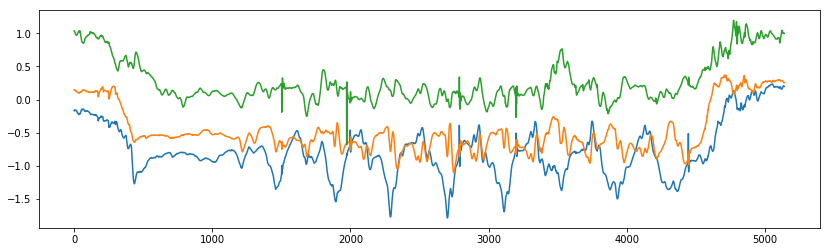

Start Index: 2000
Finish Index: 4500
data/accelerometer/left_hand1.csv saved


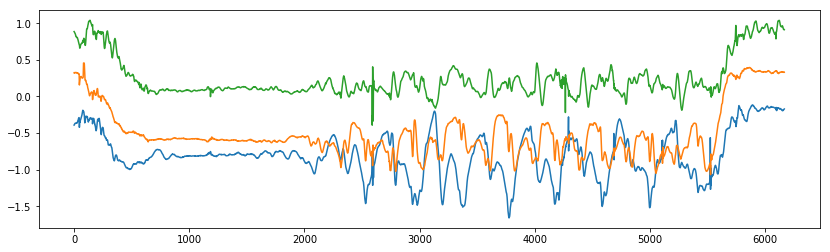

Start Index: 2500
Finish Index: 5500
data/accelerometer/left_hand2.csv saved


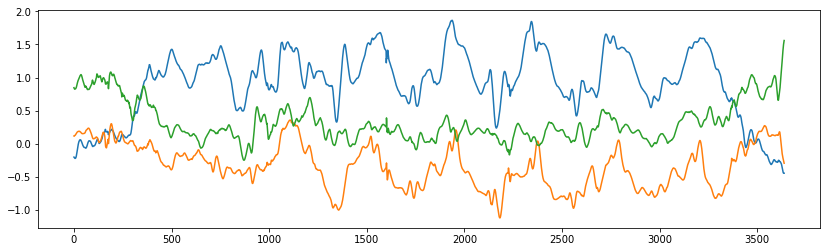

Start Index: 1000
Finish Index: 3000
data/accelerometer/right_hand1.csv saved


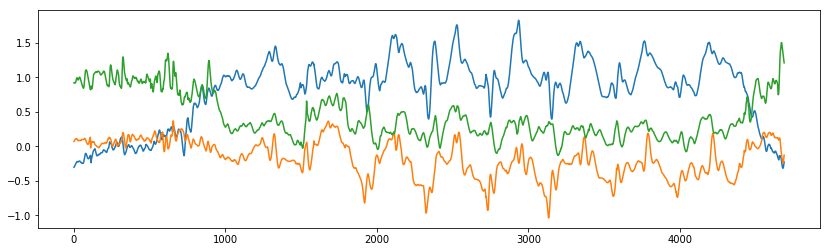

Start Index: 2000
Finish Index: 4000
data/accelerometer/right_hand2.csv saved


In [16]:
for filepath in filepaths:
    # Read data
    df = pd.read_csv(filepath)
    
    # Plot data
    fig, ax = plt.subplots(figsize=(14, 4))
    ax.plot(df[['gFx', 'gFy', 'gFz']])
    plt.show()
    
    # Enter Start/Finish Index
    sidx = int(input('Start Index: '))
    fidx = int(input('Finish Index: '))
    
    # Save sliced data
    basename = os.path.basename(filepath)
    save_filepath = f'data/{sensor}/{basename}'
    df.iloc[sidx:fidx].to_csv(save_filepath, index=False)
    print(save_filepath, 'saved')

### 3. Remove Outlier from Gyroscope Data
#### 3.1. Get Filepaths with `glob`

In [17]:
sensor = 'gyroscope'
filepaths = sorted(glob(f'data/{sensor}/raw/*.csv'))
filepaths

['data/gyroscope/raw/left_hand1.csv',
 'data/gyroscope/raw/left_hand2.csv',
 'data/gyroscope/raw/right_hand1.csv',
 'data/gyroscope/raw/right_hand2.csv']

#### 3.2. Read Data with `pd.read_csv`
`df.head()` will return top 5 rows.

In [18]:
df = pd.read_csv(filepaths[0])
df.head()

time  wx (rad/s)  wy (rad/s)  wz (rad/s)
0  0.018        0.07       -0.05        0.01
1  0.018        0.05       -0.03       -0.01
2  0.018        0.04       -0.02       -0.03
3  0.018        0.03       -0.00       -0.03
4  0.018        0.02        0.00       -0.01

#### 3.3. Plot Data and Remove Outlier with Start/Finish Index

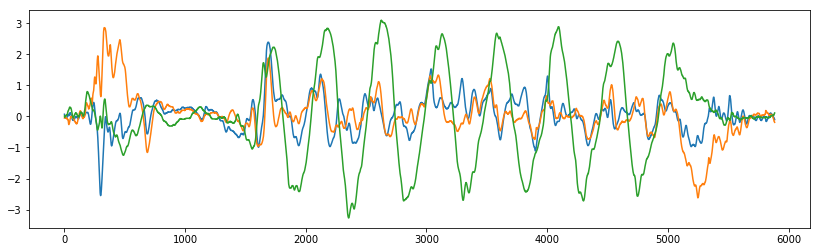

Start Index: 2000
Finish Index: 4500
data/gyroscope/left_hand1.csv saved


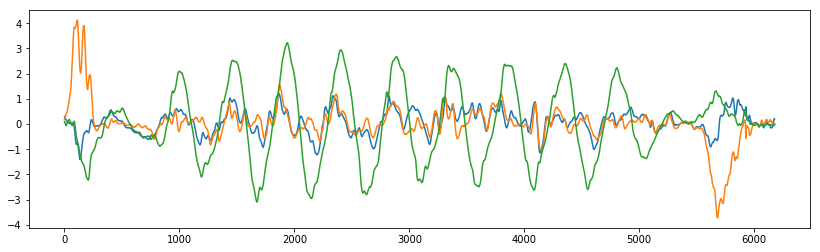

Start Index: 1500
Finish Index: 4500
data/gyroscope/left_hand2.csv saved


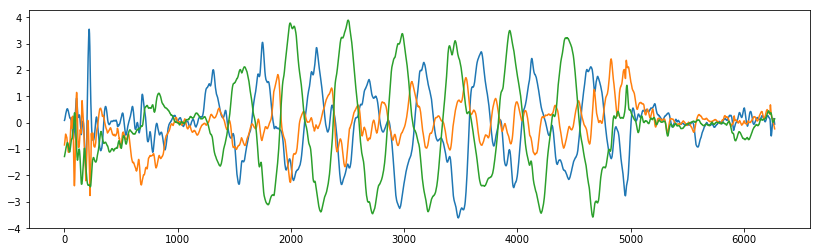

Start Index: 1500
Finish Index: 4500
data/gyroscope/right_hand1.csv saved


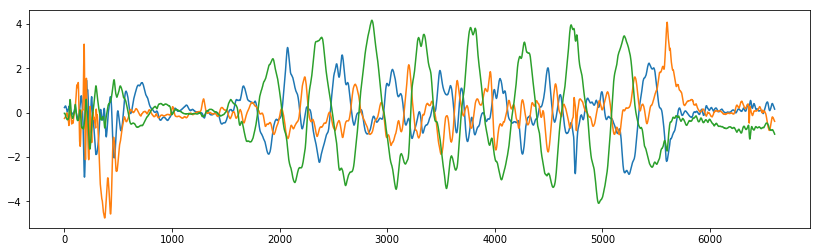

Start Index: 2000
Finish Index: 5000
data/gyroscope/right_hand2.csv saved


In [19]:
for filepath in filepaths:
    # Read data
    df = pd.read_csv(filepath)
    
    # Plot data
    fig, ax = plt.subplots(figsize=(14, 4))
    ax.plot(df[['wx (rad/s)', 'wy (rad/s)', 'wz (rad/s)']])
    plt.show()
    
    # Enter Start/Finish Index
    sidx = int(input('Start Index: '))
    fidx = int(input('Finish Index: '))
    
    # Save sliced data
    basename = os.path.basename(filepath)
    save_filepath = f'data/{sensor}/{basename}'
    df.iloc[sidx:fidx].to_csv(save_filepath, index=False)
    print(save_filepath, 'saved')